<a href="https://colab.research.google.com/github/Elakiyasuresh/Elakiyasuresh/blob/main/synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

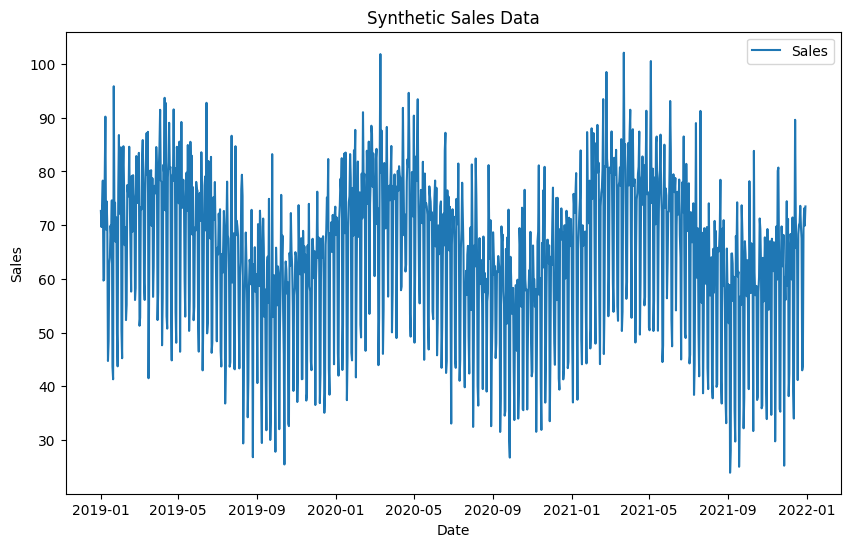

Mean Squared Error: 21.57


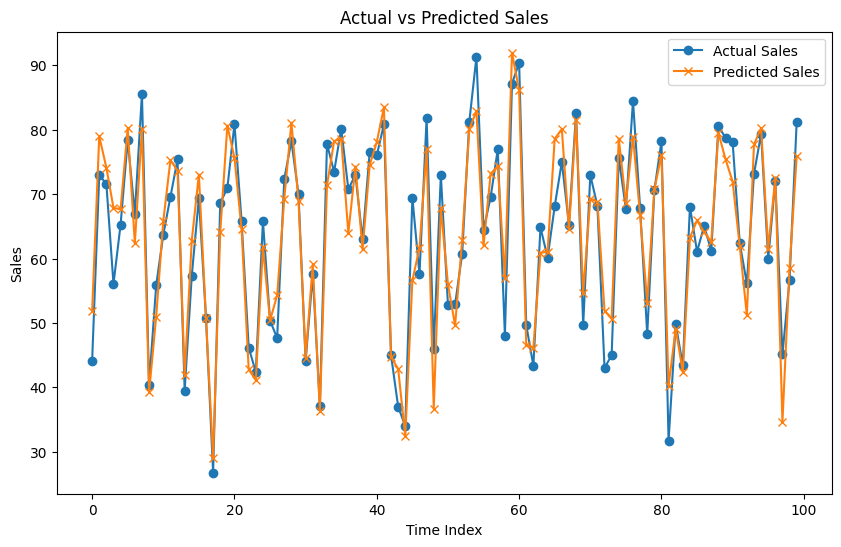

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Create Synthetic Dataset
np.random.seed(42)

def create_synthetic_sales_data(n_days=365 * 3):
    dates = pd.date_range(start="2019-01-01", periods=n_days, freq="D")
    sales = (
        50  # baseline sales
        + 10 * (np.sin(2 * np.pi * dates.dayofyear / 365))  # seasonal effect
        + np.where(dates.weekday < 5, 20, -5)  # higher sales on weekdays
        + np.random.normal(0, 5, n_days)  # noise
    )
    is_holiday = np.random.choice([0, 1], size=n_days, p=[0.9, 0.1])
    sales += is_holiday * 15  # sales boost on holidays

    data = pd.DataFrame({
        "date": dates,
        "sales": sales,
        "day_of_week": dates.weekday,
        "is_holiday": is_holiday,
        "year": dates.year,
        "month": dates.month,
        "day": dates.day,
    })
    return data

data = create_synthetic_sales_data()

# Step 2: Visualize the Dataset
plt.figure(figsize=(10, 6))
plt.plot(data["date"], data["sales"], label="Sales")
plt.title("Synthetic Sales Data")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Step 3: Feature Engineering
data["lag_1"] = data["sales"].shift(1)
data["lag_7"] = data["sales"].shift(7)
data["rolling_mean_7"] = data["sales"].rolling(window=7).mean()
data["rolling_std_7"] = data["sales"].rolling(window=7).std()
data = data.dropna()

# Step 4: Train-Test Split
X = data[["day_of_week", "is_holiday", "lag_1", "lag_7", "rolling_mean_7", "rolling_std_7"]]
y = data["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:100], label="Actual Sales", marker="o")
plt.plot(y_pred[:100], label="Predicted Sales", marker="x")
plt.title("Actual vs Predicted Sales")
plt.xlabel("Time Index")
plt.ylabel("Sales")
plt.legend()
plt.show()
